<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="imgs/pat.jpg" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Clustering: K-Means versus Mean Shift

`Task 4: May 20 – Mai 27`

- [Exercise 1](#1) 
    - [Exercise 1.1 KMeans](#1.1) 
    - [Exercise 1.2 MeanShift](#1.2)
- [Exercise 2](#2)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from scipy.spatial import distance
import matplotlib as mpl
from matplotlib.transforms import Bbox

np.random.seed(42)

<a name='1'></a>

# Exercise 1

In [4]:
def full_extent(ax, pad=0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

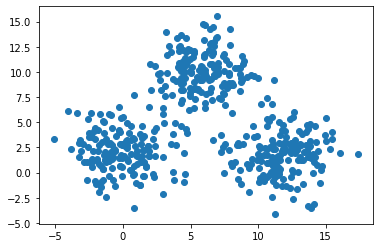

In [5]:
centers = [[0,2], [12,2], [6,10]]
data, _ = make_blobs(n_samples=500, centers=centers, n_features=2, random_state=0, cluster_std=2)
plt.scatter(data[:,0], data[:,1]);

# Exercise 2

### 2.1

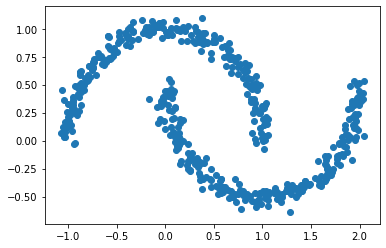

In [78]:
data, _ = make_moons(n_samples=500, noise=0.05)
plt.scatter(data[:,0], data[:,1])

### 2.2

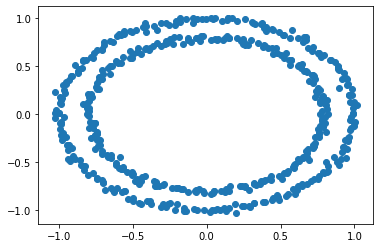

In [87]:
data, y = make_circles(n_samples=500, noise=0.02)
plt.scatter(data[:,0], data[:,1])

<a name='1.1'></a>

### Exercise 1.1 KMeans

In [6]:
def kmeans(num_centers=2, data=data):
    convergence = 100
    loss = []
    center_points = []
    center_arrays = []  
    
    colors = {0: "pink", 1: "green", 2: 'blue'}
    centers = np.random.uniform((np.min(data), np.max(data)), size=(num_centers, 2))

    while(convergence > 0.01):

        center_array = np.zeros(len(data))

        for i, x in enumerate(data):
            closest_center = np.argmin([np.linalg.norm(x - center) for center in centers]) 
            center_array[i] = closest_center

        new_centers = np.array([np.mean(data[center_array == i], axis=0) for i in range(num_centers)])    
        convergence = np.sum(np.abs(new_centers - centers))
        centers = new_centers

        center_points.append(new_centers)
        center_arrays.append(center_array)
        loss.append(convergence)
    
    center_points = np.array(center_points)
    center_arrays = np.array(center_arrays)    
    color = [colors[x] for x in center_array]
    num_rows = int(center_points.shape[0] / 2 + 1)
    fig, axs = plt.subplots(num_rows, 2, figsize=(16,num_rows*4))
    axs = axs.flatten()

    for i in range(len(center_points)):

        centers = center_points[i]
        color_array = center_arrays[i]
        color = [colors[x] for x in color_array]

        for j, x in enumerate(data):
            axs[i].scatter(x[0], x[1], color=color[j], s=20)
            axs[i].scatter(centers[:,0], centers[:,1], color="red", s=150)
        
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('ax' + str(i) + '.png', bbox_inches=extent)
    return loss

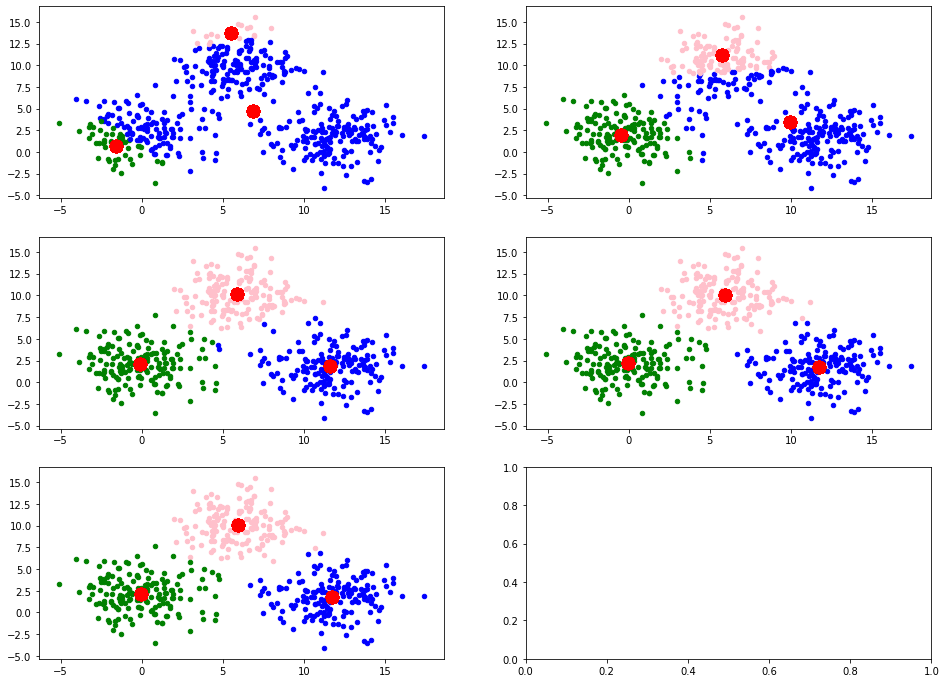

In [8]:
loss = kmeans(num_centers=3, data=data)

## Loss

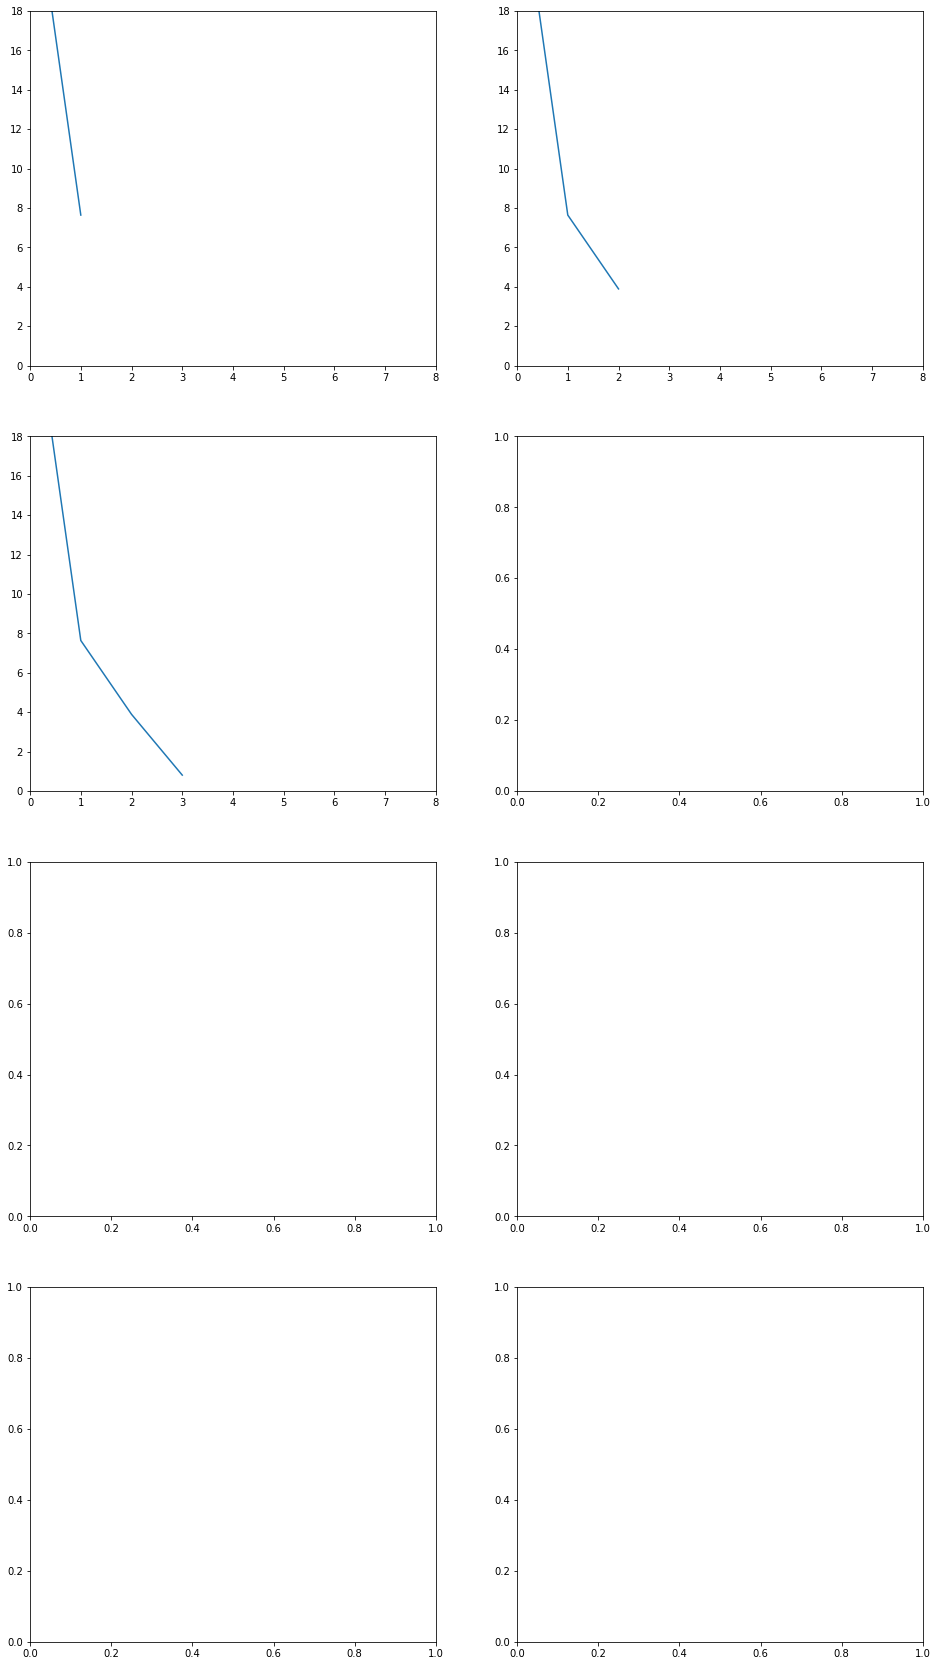

In [140]:
fig, axs = plt.subplots(len,2, figsize=(16,30))
axs = axs.flatten()
loss = np.array(loss)

for i, l in enumerate(loss[:-2]):
    axs[i].plot(loss[:i+2])
    axs[i].set_xlim([0,8])
    axs[i].set_ylim([0,18])
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('exc4_imgs/loss' + str(i) + '.png', bbox_inches=extent)

<a name='1.2'></a>

### Exercise 1.2 MeanShift

In [94]:
centroids = {}
centroid_arr = []
radius = 5

center_points = []
center_arrays = []  

for i in range(len(data)):
    centroids[i] = data[i]

while True:
    
    new_centroids = []
    
    for i in centroids:
        
        in_bandwidth = []
        centroid = centroids[i]
        
        for x in data:
            if(np.linalg.norm(x - centroid) < radius):
                in_bandwidth.append(x)

        new_centroid = np.mean(in_bandwidth, axis=0)
        new_centroids.append(tuple(new_centroid))

    uniques = sorted(list(set(new_centroids)))

    prev_centroids = dict(centroids)

    centroids = {}
    
    for i in range(len(uniques)):
        centroids[i] = np.array(uniques[i])
        
    centroid_arr = []
    for i in range(len(centroids)):
        centroid_arr.append(centroids[i])

    # centers for iterations
    center_points.append(np.array(centroid_arr))
    
    optimized = True

    for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]):
            optimized = False
        if not optimized:
            break

    if optimized:
        break

In [95]:
centroid_arr = []

for i in range(len(centroids)):
    centroid_arr.append(centroids[i])
    
centroid_arr = np.array(centroid_arr)

In [96]:
dist_arr = [5]
dist_arrs = []

for j in range(len(center_points)):
    centroid_arr = center_points[j]
    for i in range(len(centroid_arr) - 1):
        dist = np.linalg.norm(centroid_arr[i] - centroid_arr[i+1])
        dist_arr.append(dist)
    dist_arrs.append(dist_arr)
    
dist_arr = np.array(dist_arr)

In [97]:
#for i in range(len(center_points)):
#    center_points[i] = center_points[i][dist_arrs[i] > radius/2]

In [98]:
#centroid_arr = centroid_arr[dist_arrs > radius/2]

In [99]:
ms_center_array = np.zeros(len(data))
colors = {0: "pink", 1: "green", 2: 'blue', 3: 'yellow', 4: 'black'}

for i, x in enumerate(data):
    closest_center = np.argmin([np.linalg.norm(x - center) for center in centroid_arr]) 
    ms_center_array[i] = closest_center

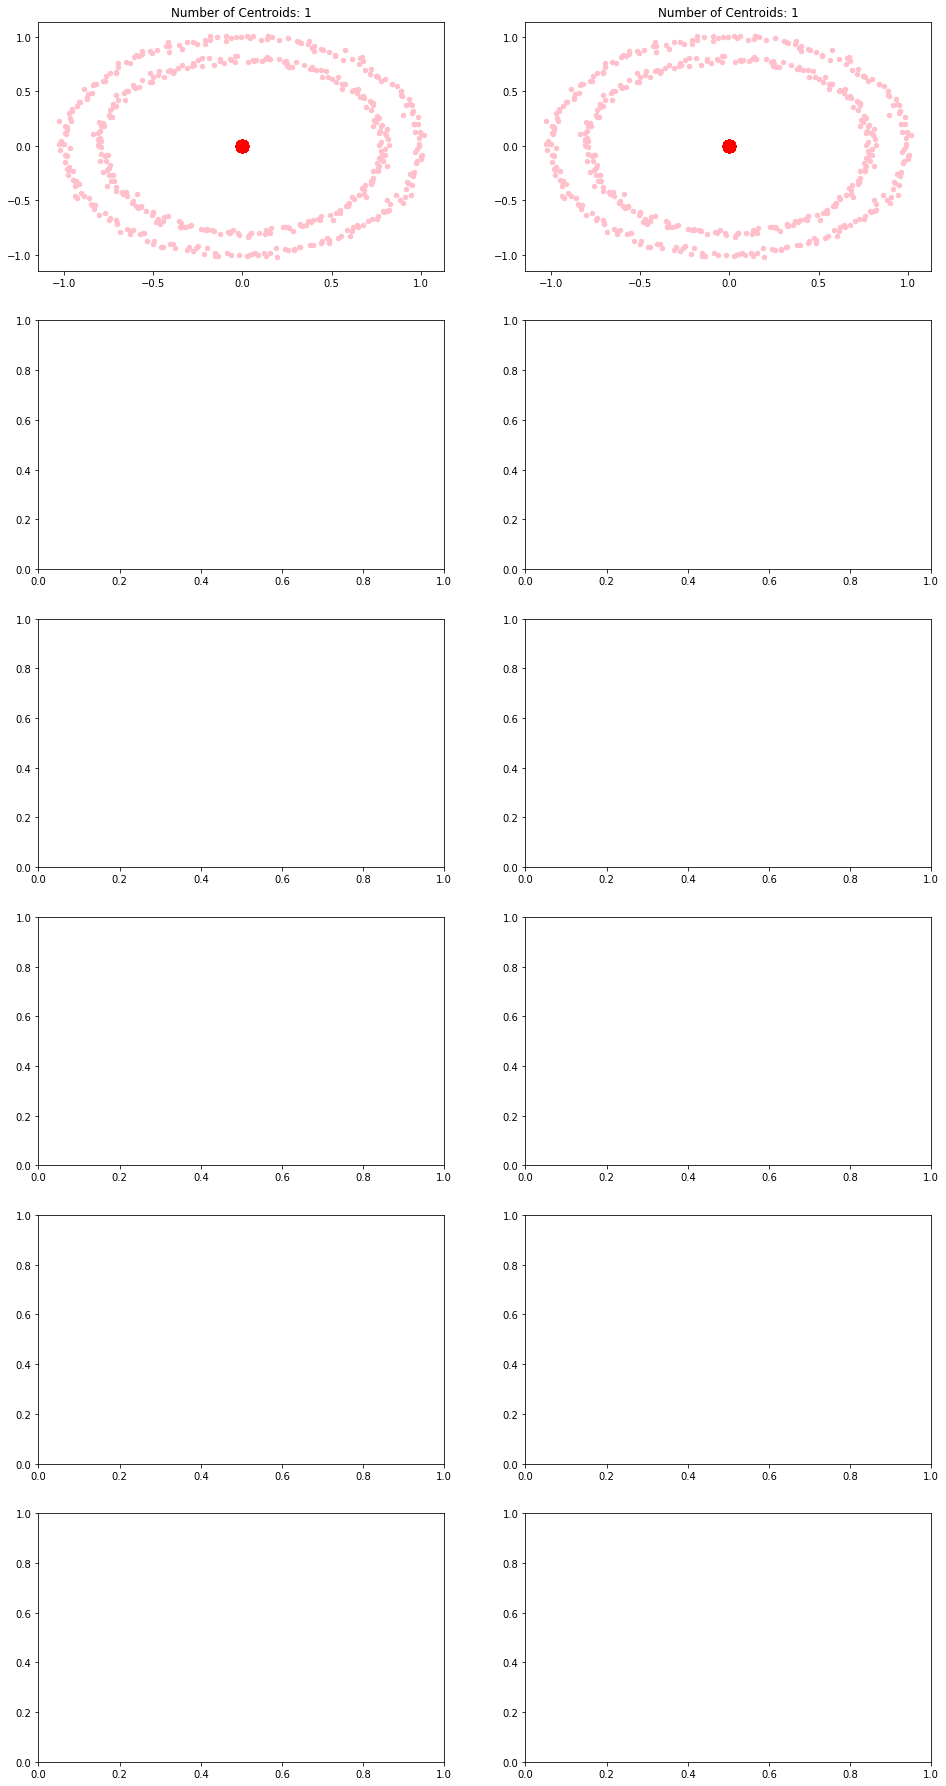

In [100]:
fig, axs = plt.subplots(6, 2, figsize=(16,32))
#axs = plt.gca()
axs = axs.flatten()

for i in range(len(center_points)):

    centers = center_points[i]
    
    for k, x in enumerate(data):
        closest_center = np.argmin([np.linalg.norm(x - center) for center in centers]) 
        ms_center_array[k] = closest_center
    
    if len(set(ms_center_array)) < 5:
        color = [colors[x] for x in ms_center_array]
    else:
        color = np.array((len(ms_center_array) * "blue ").split(" "))
    
    for j, x in enumerate(data):
        axs[i].scatter(x[0], x[1], color=color[j], s=20)
        axs[i].scatter(centers[:,0], centers[:,1], color="red", s=150)
        
        #for centroid in centers:
        #    x = centroid[0]
        #    y = centroid[1]
        #    axs[i].scatter(x, y, color="red", s=150)
        #    circle = plt.Circle((x, y), radius, color='r', fill=False)
        #    axs[i].add_artist(circle)
        
        axs[i].set_title(f"Number of Centroids: {len(centers)}")

    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('ax' + str(i) + '.png', bbox_inches=extent)

## With circle

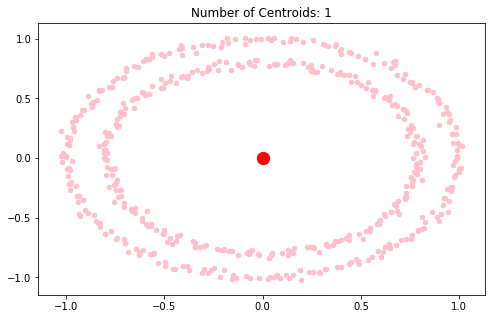

In [101]:
plt.figure(figsize=(8,5))
color = [colors[x] for x in ms_center_array]
ax = plt.gca()

for i, x in enumerate(data):
    plt.scatter(x[0], x[1], color=color[i], s=20)
    
for centroid in centroid_arr:
    x = centroid[0]
    y = centroid[1]
    plt.scatter(x, y, color="red", s=150)
    circle = plt.Circle((x, y), radius, color='r', fill=False)
    ax.add_artist(circle)

    
plt.title(f"Number of Centroids: {len(centroids)}")
plt.show()

<a name='2'></a>

# Exercise 2